<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Filter-proteins-for-Union-of-Experiments-2-&amp;-3" data-toc-modified-id="Filter-proteins-for-Union-of-Experiments-2-&amp;-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Filter proteins for Union of Experiments 2 &amp; 3</a></span></li><li><span><a href="#Falsly-identified-prenylated-proteins" data-toc-modified-id="Falsly-identified-prenylated-proteins-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Falsly identified prenylated proteins</a></span><ul class="toc-item"><li><span><a href="#Clean-all-lists-of-identified-proteins-by-removing-the-false-positives-and-save-them" data-toc-modified-id="Clean-all-lists-of-identified-proteins-by-removing-the-false-positives-and-save-them-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Clean all lists of identified proteins by removing the false positives and save them</a></span></li><li><span><a href="#Are-the-false-positives-F,-GG-or-F-&amp;-GG?" data-toc-modified-id="Are-the-false-positives-F,-GG-or-F-&amp;-GG?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Are the false positives F, GG or F &amp; GG?</a></span></li><li><span><a href="#Fractions-of-false-positives-in-all-identified-proteins" data-toc-modified-id="Fractions-of-false-positives-in-all-identified-proteins-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fractions of false positives in all identified proteins</a></span></li><li><span><a href="#Check-if-number-of-false-positives-corresponds-to-general-expectation-of-proteins-without-any-cysteine-or-is-less" data-toc-modified-id="Check-if-number-of-false-positives-corresponds-to-general-expectation-of-proteins-without-any-cysteine-or-is-less-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Check if number of false positives corresponds to general expectation of proteins without any cysteine or is less</a></span></li></ul></li><li><span><a href="#Identified-prenylated-proteins" data-toc-modified-id="Identified-prenylated-proteins-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Identified prenylated proteins</a></span><ul class="toc-item"><li><span><a href="#New-identified-prenylated-proteins" data-toc-modified-id="New-identified-prenylated-proteins-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>New identified prenylated proteins</a></span></li><li><span><a href="#Known-identified-prenylated-proteins" data-toc-modified-id="Known-identified-prenylated-proteins-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Known identified prenylated proteins</a></span></li><li><span><a href="#All-identified-prenylated-proteins" data-toc-modified-id="All-identified-prenylated-proteins-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>All identified prenylated proteins</a></span></li></ul></li><li><span><a href="#Pre-processing-of-disulfide-bonds-output-.csv-file-from-UniProt" data-toc-modified-id="Pre-processing-of-disulfide-bonds-output-.csv-file-from-UniProt-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pre-processing of disulfide bonds output .csv file from UniProt</a></span></li></ul></div>

In [1]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from venn import venn
from matplotlib_venn import venn2
from functions import percent
from functions import preprocess
from functions import read_fastafile
from functions import clean_agg
from scipy.stats import hypergeom
from functions import fishers_exact_test

In [3]:
# Display session information
session_info.show()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

In [5]:
datafolder = 'data'
figures = 'data/figures'
known_proteins_datafolder = '../1_Known_prenylated_proteins/data'
general = '..'

In [6]:
# Load data

# Exp1
F_stim = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_sig_Fstim_minDet.tsv'), sep='\t')
F_us = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_sig_Fus_minDet.tsv'), sep='\t')
GG_stim = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_sig_Gstim_minDet.tsv'), sep='\t')
GG_us = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_sig_Gus_minDet.tsv'), sep='\t')

# Exp2
F_wo = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_stat_sig_F.tsv'), sep='\t')
F_stat = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_stat_sig_Fstatin.tsv'), sep='\t')
GG_wo = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_stat_sig_G.tsv'), sep='\t')
GG_stat = pd.read_csv(os.path.join(datafolder, 'Click-it_GG_F', 'Th1_stat_sig_Gstatin.tsv'), sep='\t')

# All known prenylated proteins
all_UP = pd.read_csv(os.path.join(known_proteins_datafolder, 'known_proteins', 'known_all.csv'), sep=';')

# Filter proteins for Union of Experiments 1 & 2

In [7]:
F1 = set(list(F_stim['ID']) + list(F_us['ID']))
F2 = set(list(F_wo['ID']) + list(F_stat['ID']))

GG1 = set(list(GG_stim['ID']) + list(GG_us['ID']))
GG2 = set(list(GG_wo['ID']) + list(GG_stat['ID']))

In [8]:
all1 = set(list(F1) + list(GG1))
all2 = set(list(F2) + list(GG2))

In [9]:
# continue using the union between exp2 and 3
F = F1.union(F2) 
GG = GG1.union(GG2) 

all_found = set(list(F) + list(GG))

In [10]:
# separate
F_GG_found = F.intersection(GG) 
F_found = F.difference(F_GG_found) 
GG_found = GG.difference(F_GG_found)

In [11]:
# transform to df
F_df = pd.DataFrame(F_found)
GG_df = pd.DataFrame(GG_found)
F_GG_df = pd.DataFrame(F_GG_found)

# Falsly identified prenylated proteins

In [12]:
# Get the sequences of all identified proteins in FASTA format
# create uniprot sparql readable input for all identified proteins
up_input = ' '.join([s for s in all_found])

In [13]:
# FASTA file of all identified proteins, downloaded from uniprot 
sequences = read_fastafile(os.path.join(datafolder, 'fasta_files', 'idmapping_2023_09_28_identified_proteins.fasta'))

In [14]:
# save all proteins that don't have a C in their sequence to a new df called no_C
no_C = sequences[~sequences['seq'].str.contains('C')]
no_C.reset_index(drop=True, inplace=True)

print('Number of identified proteins without cysteine:', len(no_C))

Number of identified proteins without cysteine: 22


In [15]:
# Are they really false positives or is there an isoform with a cysteine?
# Look for C in the isoforms of these proteins

' '.join([s for s in no_C['ID']])

'Q8N138 P61165 Q9UMX0 Q9UHD9 Q9BY50 Q9NS69 O75915 P09669 Q8N5M9 Q9Y6D0 Q96EX1 O43676 Q9BVC6 P67812 P02656 Q9UDW1 P00846 P10412 Q99623 O75964 Q96HY6 O43493'

In [16]:
iso = read_fastafile(os.path.join(datafolder, 'fasta_files', 'idmapping_2023_09_28_identified_false_p.fasta'))

# checks for C occurence, so we get the proteins that do contain a C in ore or more isoforms and therefore aren't false positive
true_p_iso = iso[iso['seq'].str.contains('C')]
true_p_iso.reset_index(drop=True, inplace=True)

print('Found isoforms that do contain a cysteine:')
true_p_iso

Found isoforms that do contain a cysteine:


,ID,seqID,seq,len
0,P67812-3,sp|P67812-3|SC11A_HUMAN,MLSLDFLDDVRRMNKRQLYYQVLNFGMIVSSALMIWKGLMVITGSESPIVVVLSGSMEPAFHRGDLLFLTNRVEDPIRVGEIVVFRIEGREIPIVHRVLKIHEKQNGHIKFLTKGDNNAVDDRGLYKQGQHWLEKKDVVGRARGMQFSFCWVYSCWFIVSKKPALLFLGRCHSFRYWMFGVDTGL,185
1,Q96HY6-2,sp|Q96HY6-2|DDRGK_HUMAN,MVAPVWYLVAAALLVGFILFLTRSRGRAASAGQEPLHNEELAGAGRVAQPGPLEPEEPRAGGRPRRRRDLGSRLQAQRRAQRVAWAEADENEEEAVILAQEEEGVEKPAETHLSGKIGAKKLRKLEEKQARKAQREAEEAEREERKRLESQREAEWKKEEERLRLEEEQKEEEERKAREEQAQREHEEYLKLKEAFVVEEEGVGETMTEEQSQSFLTEFINYIKQSKVVLLEDLASQVGLRTQVSPGTWPAVCSVARGLWLAERTCPKDRVLMHRLPCPQPRVSSAQKSPGTLGILHFSLIAWGRESPAQAPA,313
2,Q9UDW1-2,sp|Q9UDW1-2|QCR9_HUMAN,MAAATLTSKLYSLLFRRTSTFALTIIVGVMFFERAFDQGADAIYDHINEGVRACAIPDLGPA,62
3,Q9UMX0-4,sp|Q9UMX0-4|UBQL1_HUMAN,MAESGESGGPPGSQDSAAGAEGAGAPAAAASAEPKIMKVTVKTPKEKEEFAVPENSSVQQFKEEISKRFKSHTDQLVLIFAGKILKDQDTLSQHGIHDGLTVHLVIKTQNRPQDHSAQQTNTAGSNVTTSSTPNSNSTSGSATSNPFGLDVGTCQESSNDAGDDEEPGPSFEQPRKHPRGI,181


## Clean all lists of identified proteins by removing the false positives and save them

In [17]:
# remove all proteins w/o cysteine from fasta file
sequences = sequences[~sequences['ID'].isin(no_C['ID'])]

In [18]:
# rename ID of false positives
true_p_iso = true_p_iso.replace('P67812-3','P67812')
true_p_iso = true_p_iso.replace('Q96HY6-2','Q96HY6')
true_p_iso = true_p_iso.replace('Q9UDW1-2','Q9UDW1')
true_p_iso = true_p_iso.replace('Q9UMX0-4','Q9UMX0')

# re-add false positives to sequences
sequences = pd.concat( [sequences, true_p_iso], ignore_index=True)

#save
sequences.to_csv(os.path.join(datafolder, 'identified_proteins', 'clean_fasta_seqs_identified_prots.csv'), sep=',', index=False)

In [19]:
# remove rows where ID is in list of proteins that are false positives to get clean dataframes
false_p = iso[~iso['seq'].str.contains('C')]
false_p = false_p[~false_p['ID'].str.contains('-')].reset_index(drop=True)
false_p = false_p[~false_p['ID'].isin(true_p_iso['ID'])].reset_index(drop=True)

cF_df = F_df[~F_df.loc[:,0].isin(false_p['ID'])].reset_index(drop=True)
cGG_df = GG_df[~GG_df.loc[:,0].isin(false_p['ID'])].reset_index(drop=True)
cF_GG_df = F_GG_df[~F_GG_df.loc[:,0].isin(false_p['ID'])].reset_index(drop=True)

In [20]:
all_found = {item for item in all_found if item not in false_p['ID'].tolist()}

In [21]:
dfs = [F_stim, F_us, GG_stim, GG_us, F_wo, F_stat, GG_wo, GG_stat]

for i, df in enumerate(dfs):
    # Filter each DataFrame by removing rows where 'ID' is in 'false_p['ID']'
    dfs[i] = df[~df['ID'].isin(false_p['ID'])]

## Are the false positives F, GG or F & GG?

In [22]:
false_F = F_df[F_df.loc[:,0].isin(false_p['ID'])].reset_index(drop=True)
false_GG = GG_df[GG_df.loc[:,0].isin(false_p['ID'])].reset_index(drop=True)
false_F_GG = F_GG_df[F_GG_df.loc[:,0].isin(false_p['ID'])].reset_index(drop=True)

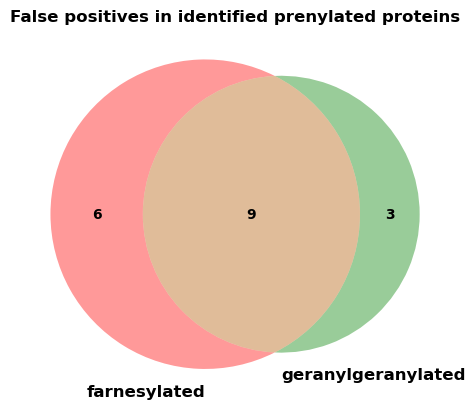

In [23]:
sets = {
    '01': len(false_GG),
    '10': len(false_F),
    '11': len(false_F_GG)
}
venn2(subsets=sets, set_labels=('farnesylated', 'geranylgeranylated'))

plt.title('False positives in identified prenylated proteins')

plt.show()

## Fractions of false positives in all identified proteins

In [24]:
print('Percentage of false positive in all identified proteins: ', round(percent(len(false_p.index), 654), 2), '% (',
      len(false_p.index), ' of ', 654, ')', sep='')

Percentage of false positive in all identified proteins: 2.75% (18 of 654)


In [25]:
# percentage of false positives per azid in identified proteins
print('false_p in all identified F: ', round(percent(len(false_F), len(F_df.index)), 2), '% (',
     len(false_F), ' of ', len(F_df.index), ')', sep='')

print('false_p in all identified GG: ', round(percent(len(false_GG), len(GG_df.index)), 2), '% (',
     len(false_GG), ' of ', len(GG_df.index), ')', sep='')

print('false_p in all identified F_GG: ', round(percent(len(false_F_GG), len(F_GG_df.index)), 2), '% (',
     len(false_F_GG), ' of ', len(F_GG_df.index), ')', sep='')

false_p in all identified F: 2.14% (6 of 280)
false_p in all identified GG: 1.85% (3 of 162)
false_p in all identified F_GG: 4.25% (9 of 212)


## Check if number of false positives corresponds to general expectation of proteins without any cysteine or is less

In [26]:
# proteins without cysteine (1479) in the human proteome (25866), 26.09.23
# canonical sequences only

# Number of all identified prenylated proteins: 654, before removing false positives

[M, n, N] = [25866 , 1479, 654]

# M = size of human proteome
# n = number of all proteins without a cystein in the human proteome
# N = all identified proteins

In [27]:
# -> We have a collection of 25866 proteins in the human proteome, of which ca. 1479 don't contain a cysteine.
# We want to know the probability of finding a given number of proteins without C if we choose at random N of 
# the 25866 human proteins.

rv = hypergeom(M, n, N)
x = np.arange(0, n+1)

pmf_false_p = rv.pmf(x)

print('Expected number of false positives:', np.argmax(pmf_false_p))
print('Actual number of false positives:', len(false_p))

Expected number of false positives: 37
Actual number of false positives: 18


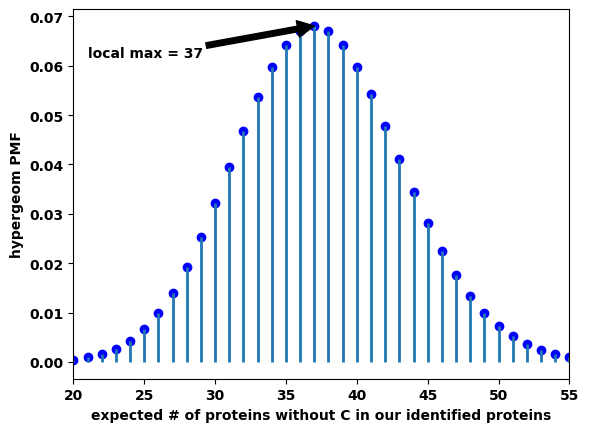

In [28]:
# Figure of most likely amount of proteins without cysteines in all identified proteins

fig, ax = plt.subplots()
ax.plot(x, pmf_false_p, 'bo')
ax.vlines(x, 0, pmf_false_p, lw=2)
plt.xlim(20, 55)
ax.set_xlabel('expected # of proteins without C in our identified proteins')
ax.set_ylabel('hypergeom PMF')

ax.annotate('local max = 37', xy=(np.argmax(pmf_false_p), pmf_false_p[np.argmax(pmf_false_p)]), xycoords='data',
            xytext=(0.03, 0.9), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(facecolor='black', shrink=0.001))

# save
plt.savefig(os.path.join(figures, 'hyper_false_p.pdf'), bbox_inches='tight')

plt.show()

In [29]:
#  Fisher’s Exact Test

p_value = fishers_exact_test(len(false_p), N, n, M)

# h0: proteins with no C are equally likely in both groups (independence)
# OR: There is no difference in the proportion of proteins with no C in both groups
# OR: A random table would have the probability of equal or less than the input table

# hA: The variables are not independent (one proportion is different to the other)
# OR: The the proportions of no C proteins are not equivalent in both groups

print('The difference between actual and expected amount of proteins without cysteines has a p-value=', 
      round(p_value, 5), '(***). \nWe have significantly less false positives in the identified prenylated proteins than expected.', sep='')

The difference between actual and expected amount of proteins without cysteines has a p-value=0.00043(***). 
We have significantly less false positives in the identified prenylated proteins than expected.


# Identified prenylated proteins

## Exp1

In [30]:
# Extract 'id' columns as sets
Exp1_F_ids = set(list(F_stim['ID']) + list(F_us['ID']))
Exp1_GG_ids = set(list(GG_stim['ID']) + list(GG_us['ID']))

all_Exp1_ids = set(list(Exp1_F_ids) + list(Exp1_GG_ids))
print(len(all_Exp1_ids))

297


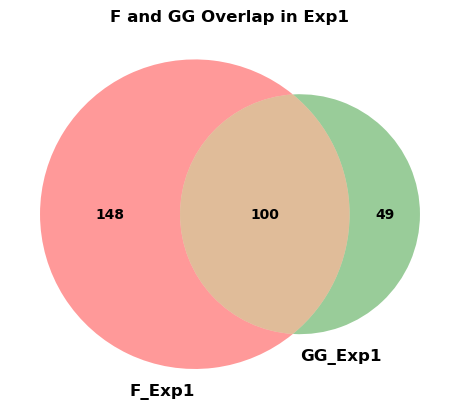

In [31]:
# Plot Venn diagram
venn2(subsets=(set(Exp1_F_ids), set(Exp1_GG_ids)), 
     set_labels=('F_Exp1', 'GG_Exp1'))

plt.title('F and GG Overlap in Exp1')
plt.show()

## Exp2

In [32]:
# Extract 'id' columns as sets
Exp2_F_ids = set(list(F_wo['ID']) + list(F_stat['ID']))
Exp2_GG_ids = set(list(GG_wo['ID']) + list(GG_stat['ID']))

all_Exp2_ids = set(list(Exp2_F_ids) + list(Exp2_GG_ids))
print(len(all_Exp2_ids))

520


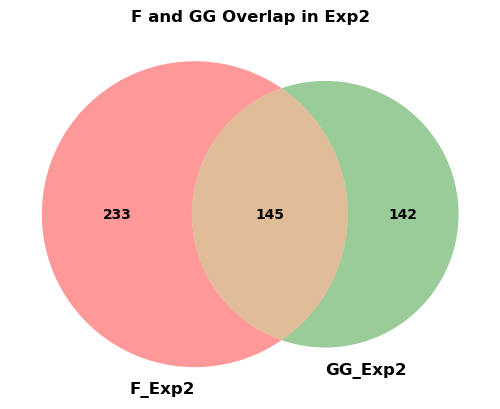

In [33]:
# Plot Venn diagram
venn2(subsets=(set(Exp2_F_ids), set(Exp2_GG_ids)), 
     set_labels=('F_Exp2', 'GG_Exp2'))

plt.title('F and GG Overlap in Exp2')
plt.show()

## Union

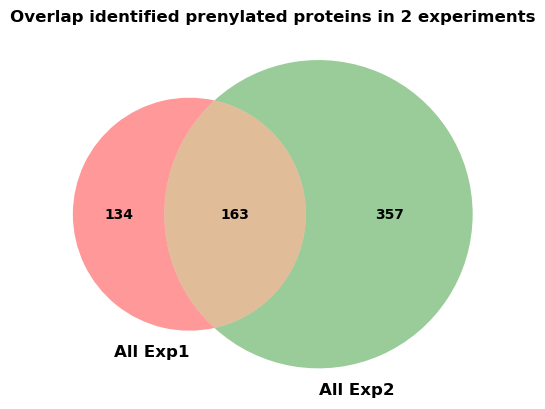

In [34]:
venn2(subsets=(set(all_Exp1_ids), set(all_Exp2_ids)), 
     set_labels=('All Exp1', 'All Exp2'))

plt.title('Overlap identified prenylated proteins in 2 experiments')

plt.show()

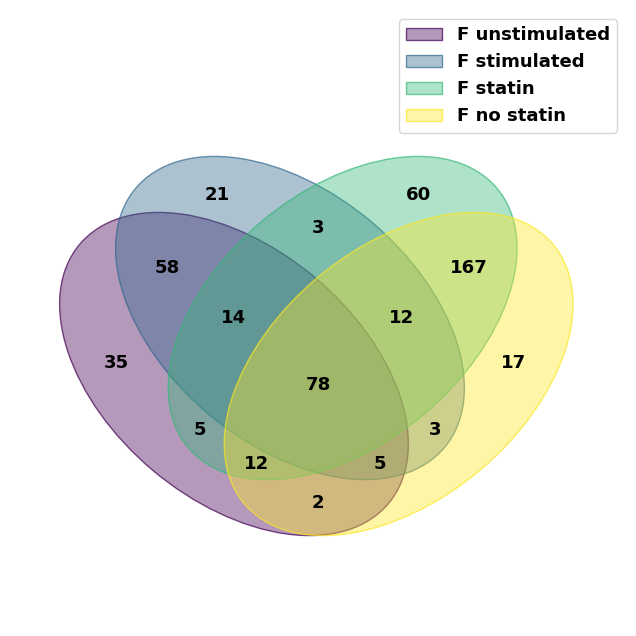

In [35]:
F_venn4 = {'F unstimulated': set(F_us['ID']), 'F stimulated': set(F_stim['ID']),
          'F statin': set(F_stat['ID']), 'F no statin': set(F_wo['ID'])}

venn(F_venn4)
plt.show()

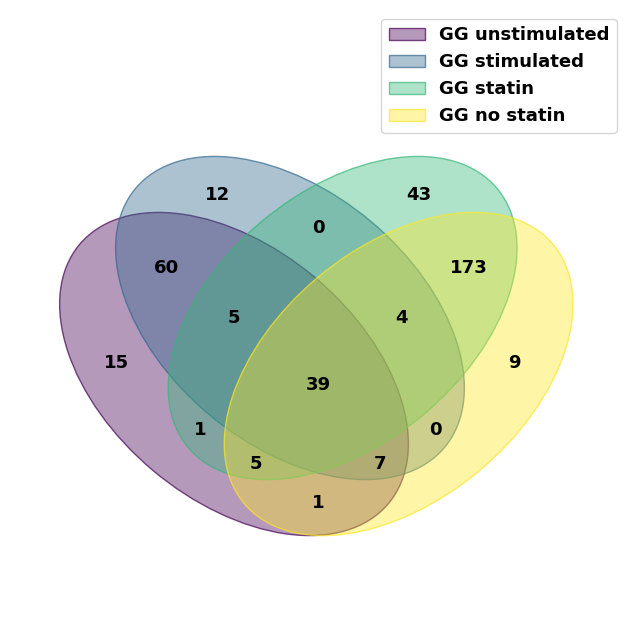

In [36]:
GG_venn4 = {'GG unstimulated': set(GG_us['ID']), 'GG stimulated': set(GG_stim['ID']),
          'GG statin': set(GG_stat['ID']), 'GG no statin': set(GG_wo['ID'])}

venn(GG_venn4)
plt.show()

In [37]:
# List of DataFrames
dfs = [F_stim, F_us, GG_stim, GG_us, F_wo, F_stat, GG_wo, GG_stat]
df_names = ["F_stim", "F_us", "GG_stim", "GG_us", "F_wo", "F_stat", "GG_wo", "GG_stat"]

# Combine all DataFrames into one for name lookup
combined_df = pd.concat(dfs)

# Create a dictionary mapping IDs to names
id_to_name = dict(zip(combined_df["ID"], combined_df["name"]))

# Initialize the master DataFrame
master_df = pd.DataFrame({"Protein_ID": list(all_found)})

# Add the Protein_Name column using the mapping
master_df["Protein_Name"] = master_df["Protein_ID"].map(id_to_name)

# Add presence/absence columns for each DataFrame
for df, name in zip(dfs, df_names):
    # Add a column for presence (1) or absence (0)
    master_df[name] = master_df["Protein_ID"].apply(lambda x: 1 if x in df["ID"].values else 0)

In [38]:
# Add a column for known to be prenylated proteins (NaN=not known, 1=known, 2=known_discrepancy)

# Conditions for F, GG matching
f_columns = ["F_stim", "F_us", "F_wo", "F_stat"]
gg_columns = ["GG_stim", "GG_us", "GG_wo", "GG_stat"]

for index in master_df.index:
    protein_id = master_df.at[index, "Protein_ID"]

    if protein_id in all_UP["ID"].values:
        moiety = all_UP.loc[all_UP["ID"] == protein_id, "moiety"].values[0]

        if moiety == "S-farnesyl cysteine" and any(master_df.loc[index, col] == 1 for col in f_columns) and all(master_df.loc[index, col] == 0 for col in gg_columns):
            master_df.at[index, "known_to_be_prenylated"] = 1
            
        elif moiety == "S-geranylgeranyl cysteine" and any(master_df.loc[index, col] == 1 for col in gg_columns) and all(master_df.loc[index, col] == 0 for col in f_columns):
            master_df.at[index, "known_to_be_prenylated"] = 1
            
        else:
            master_df.at[index, "known_to_be_prenylated"] = 2

# Convert the column to integers
master_df["known_to_be_prenylated"] = master_df["known_to_be_prenylated"].fillna(0).astype(int)

In [39]:
# Add column for isoform number from true_p_iso, proteins with a cysteine in their isoform
id_to_pattern = dict(zip(true_p_iso["ID"], true_p_iso["seqID"]))
master_df["non_canonical_isoform"] = master_df["Protein_ID"].map(id_to_pattern).str.extract(r'-(\d+)\|')

In [40]:
# Save in general folder
master_df.to_csv(os.path.join('..', 'master_df.csv'), sep=',', index=False)

## New identified prenylated proteins

In [41]:
# To gain more knowledge about the identified prenylated proteins, they will also be searched in UniProt and the same variables 
# as in 'uniprot_ext' are saved in 'new_all_ext'

In [42]:
# Of all identified proteins, keep only those IDs not present in known prenylated proteins list
new_all = [x for x in all_found if x not in list(set(all_UP['ID']))]

In [43]:
# Create uniprot sparql readable input for all found proteins that were not previously know to be prenylated
up_input = ' '.join(['uniprotkb:' + str(s) for s in new_all])

In [44]:
# load sparqle query2 results
new_all_ext = pd.read_csv(os.path.join(datafolder, 'UniProt_SPARQL_queries', 'up_output_new_proteins_28.09.23.csv'), sep=';')

In [45]:
# Preprocess raw UniProt output
new_all_ext = preprocess(new_all_ext)
new_all_ext = new_all_ext[new_all_ext['ID'].isin(pd.Series(new_all))]

new_all_ext = new_all_ext.groupby('ID').agg(set).reset_index()
new_all_ext = clean_agg(new_all_ext)

In [46]:
# Here we have information about the novel identified prenylated proteins that is in UniProt
# obviously without any S-farnesyl cysteine or S-geranylgeranyl cysteine as the moiety, therefore we
# re-add info about GG/F and stim/us to extended identified proteins list

# Initialize Exp moiety column with 0
new_all_ext['Exp_moiety'] = 0

for ID in new_all_ext['ID']:
    if ID in list(F_found):
        new_all_ext.loc[new_all_ext['ID'] == ID, 'Exp_moiety'] = "S-farnesyl cysteine"
    if ID in list(GG_found):
        new_all_ext.loc[new_all_ext['ID'] == ID, 'Exp_moiety'] = "S-geranylgeranyl cysteine"
    if ID in list(F_GG_found):
        new_all_ext.loc[new_all_ext['ID'] == ID, 'Exp_moiety'] = '[S-farnesyl cysteine, S-geranylgeranyl cysteine]'
        
# Initialize motif column with 0
new_all_ext['motif'] = np.nan
        
#save
new_all_ext.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel.csv'), sep=',', index=False)

## Known identified prenylated proteins

In [47]:
identified_known = all_UP[all_UP['ID'].isin(all_found)].reset_index(drop=True)

In [48]:
# Initialize Exp moiety column with 0
identified_known['Exp_moiety'] = 0

for ID in identified_known['ID']:
    if ID in list(F_found):
        identified_known.loc[identified_known['ID'] == ID, 'Exp_moiety'] = "S-farnesyl cysteine"
    if ID in list(GG_found):
        identified_known.loc[identified_known['ID'] == ID, 'Exp_moiety'] = "S-geranylgeranyl cysteine"
    if ID in list(F_GG_found):
        identified_known.loc[identified_known['ID'] == ID, 'Exp_moiety'] = '[S-farnesyl cysteine, S-geranylgeranyl cysteine]'

In [49]:
#save
identified_known.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_known.csv'), sep=',', index=False)

## All identified prenylated proteins

In [50]:
identified_all = pd.concat( [new_all_ext, identified_known], ignore_index=True)

#save
identified_all.to_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all.csv'), sep=',', index=False)

# Pre-processing of disulfide bonds output .csv file from UniProt

In [51]:
# Create uniprot sparql readable input for all identified prenylated proteins

In [52]:
up_input = ' '.join(['uniprotkb:' + str(s) for s in all_found])

In [53]:
# clean SPARQL output of bonded cysteines

#bonded = pd.read_csv(os.path.join(datafolder, 'UniProt_SPARQL_queries', 'up_output_multi_disulfid_04.10.23.csv'), sep=';')

#bonded = bonded.dropna().reset_index(drop=True).rename(columns={'primaryAccession': 'ID', 'index': 'bond_Cpos'})

#for i, m in enumerate(bonded['bond_Cpos']):
    #bonded['bond_Cpos'][i] = re.sub(r'\^.*', '', str(m))

# remove unreliable entries
#bonded = bonded.loc[bonded['evidenceCode'] != 'ECO_0000250']
#bonded = bonded.drop(['evidenceCode'], axis=1).reset_index(drop=True)

#bonded.to_csv(os.path.join(datafolder, 'UniProt_SPARQL_queries', 'up_output_multi_disulfid_04.10.23.csv'), sep=';', index=False)